<a href="https://colab.research.google.com/github/kubohenrique/PROJETOS_EDS/blob/main/PROJETO_SPOTIFY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Perimitindo que todas as colunas sejam visualizadas
pd.options.display.max_columns = None

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [43]:
# Importando os dados
df = pd.read_csv('https://raw.githubusercontent.com/rafaelnduarte/Spotify_Mood_Playlist/master/data/brazil_data.csv', index_col=0)
df.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Dadá Boladão,Surtada - Remix Brega Funk,5F8ffc8KWKNawllr5WsW0r,86,0.832,0.550,5,-7.026,0,0.0587,0.2490,0.000008,0.182,0.881,154.064,152784,4
1,Marília Mendonça,Supera - Ao Vivo,3GmJxfnUDrIs1iCfKUELFz,85,0.665,0.743,4,-4.434,1,0.0567,0.0604,0.000000,0.959,0.658,131.573,147748,4
2,MC Du Black,Gaiola É o Troco,3Uq45ipGutypFPmETfaoaH,85,0.722,0.840,10,-3.240,0,0.0785,0.4200,0.000000,0.112,0.851,150.108,187246,4
3,Anitta,Some que ele vem atrás,2qD7VoDYcrAPY0cVEfpsR5,84,0.648,0.795,0,-5.536,0,0.1700,0.0748,0.000000,0.380,0.598,180.043,194771,4
4,Jorge & Mateus,Cheirosa - Ao Vivo,2PWjKmjyTZeDpmOUa3a5da,84,0.528,0.870,11,-3.123,1,0.0851,0.2400,0.000000,0.333,0.714,152.370,181930,4


In [44]:
# Verificando o tamanho do Data Frame

print("Dimensão do Data Frame:")
print("Linhas:\t\t{}".format(df.shape[0]))
print("Colunas:\t{}".format(df.shape[1]))

Dimensão do Data Frame:
Linhas:		9239
Colunas:	17


Vamos verificar se possui alguma dado faltante no arquivo

In [45]:
df.isnull().sum().sort_values(ascending=True)

artist_name         0
tempo               0
valence             0
liveness            0
instrumentalness    0
acousticness        0
speechiness         0
duration_ms         0
mode                0
key                 0
energy              0
danceability        0
popularity          0
track_id            0
track_name          0
loudness            0
time_signature      0
dtype: int64

Não exite dados faltantes.
Agora vamos verificar os dados estatísticos dos dados:

In [46]:
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9.239000e+03,9239.000000
mean,45.143955,0.577666,0.521246,5.202403,-10.764562,0.632644,0.097075,0.464533,0.190364,0.216142,0.479810,119.459796,2.057333e+05,3.879532
std,26.414499,0.201068,0.291566,3.601579,7.986380,0.482111,0.106355,0.371628,0.349610,0.207558,0.259899,30.566493,1.098136e+05,0.519059
min,0.000000,0.000000,0.000020,0.000000,-45.136000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.262700e+04,0.000000
25%,19.000000,0.426000,0.254000,2.000000,-15.290000,0.000000,0.039900,0.097500,0.000000,0.096800,0.265000,95.731500,1.574850e+05,4.000000
50%,52.000000,0.609000,0.583000,5.000000,-7.423000,1.000000,0.053000,0.393000,0.000007,0.126000,0.480000,121.075000,1.892680e+05,4.000000
75%,65.000000,0.734000,0.764500,8.000000,-5.160000,1.000000,0.099700,0.881000,0.076200,0.249500,0.688000,138.102500,2.268965e+05,4.000000
max,100.000000,0.983000,1.000000,11.000000,2.036000,1.000000,0.950000,0.996000,0.995000,1.000000,0.989000,218.365000,1.493227e+06,5.000000


Vamos plotar agora um histograma para verificar a distribuição das features:

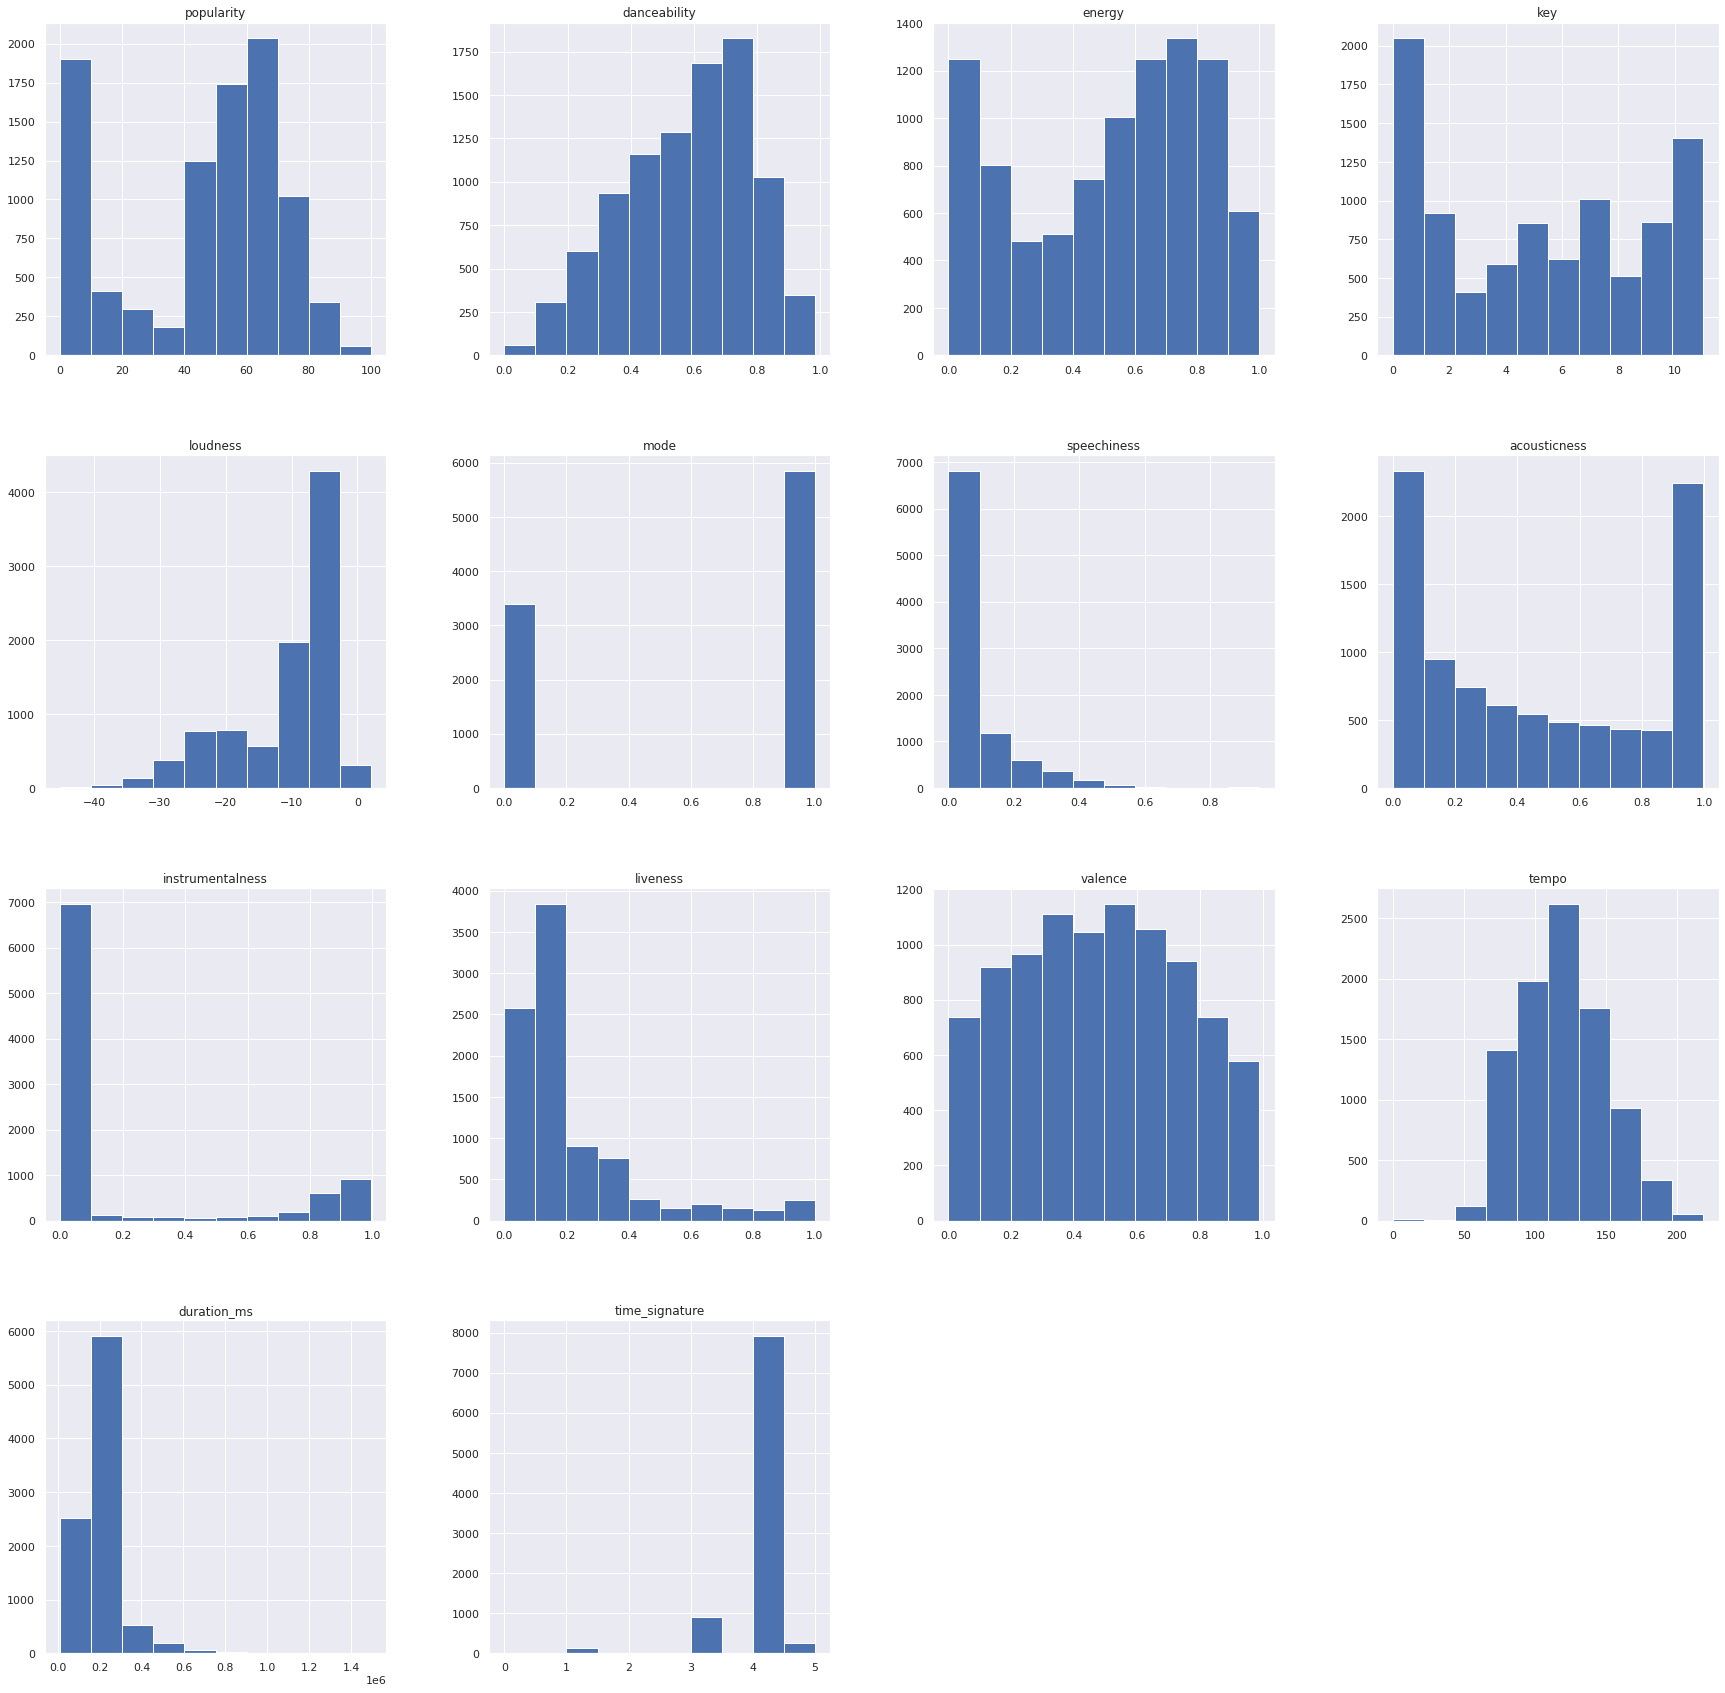

In [47]:
df.hist(figsize=(30,30));

Podemos ver que possui alguns outliers, porém por hora podemos ignorar eles.

Verificaremos se os dados possuem valores únicos:

In [48]:
print("\nValores Únicos: ")
print(df.nunique().sort_values())


Valores Únicos: 
mode                   2
time_signature         5
key                   12
popularity           101
danceability         906
speechiness         1199
valence             1299
liveness            1391
energy              1656
acousticness        2183
instrumentalness    2544
artist_name         2660
loudness            7148
tempo               8127
duration_ms         8434
track_name          9018
track_id            9239
dtype: int64


É interessante notar que algumas colunas possuem poucos valores únicos.

Podemos vericar também que o track_name possui menos entradas que o track_id, isso pode ter ocorrido por haver versões diferentes da mesma música.

Vamos analisar agora as variáveis categóricas:

In [49]:
df.describe(include="O")

,artist_name,track_name,track_id
count,9239,9239,9239
unique,2660,9018,9239
top,Ludwig van Beethoven,Forever,1KdwnsWOvhM53vezy5ROuf
freq,1200,6,1


Alguma coisa está estranha, pois os artistas mais populares do Brasil não são o Beethoven. Ele aparecena lista provavelmente pq nas playlists de produtividade entre outras eles aparecem muito.
Para realmente entender o gosto musical brasileiro, iremos encurtar o playlist. Vamos analisar 0s top 150 musicas.


In [50]:
# Verificando os artistas mais recorrentes no Brasil:
print("Artistas recorrente: ")
df['artist_name'].value_counts()

Artistas recorrente: 


Ludwig van Beethoven       1200
Johann Sebastian Bach       300
Wolfgang Amadeus Mozart     150
Frédéric Chopin              83
Armin van Buuren             64
                           ... 
Fuse ODG                      1
Wendy Salisbury               1
GoldLink                      1
Renan e Rafael                1
Guaynaa                       1
Name: artist_name, Length: 2660, dtype: int64

Como dito anteriormente, vamos nos limitar aos top 150 musicas para verificar os artistas mais recorrentes no Brasil:

In [51]:
df_top = df.copy()
df_top = df_top.iloc[:150]
df_top.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Dadá Boladão,Surtada - Remix Brega Funk,5F8ffc8KWKNawllr5WsW0r,86,0.832,0.550,5,-7.026,0,0.0587,0.2490,0.000008,0.182,0.881,154.064,152784,4
1,Marília Mendonça,Supera - Ao Vivo,3GmJxfnUDrIs1iCfKUELFz,85,0.665,0.743,4,-4.434,1,0.0567,0.0604,0.000000,0.959,0.658,131.573,147748,4
2,MC Du Black,Gaiola É o Troco,3Uq45ipGutypFPmETfaoaH,85,0.722,0.840,10,-3.240,0,0.0785,0.4200,0.000000,0.112,0.851,150.108,187246,4
3,Anitta,Some que ele vem atrás,2qD7VoDYcrAPY0cVEfpsR5,84,0.648,0.795,0,-5.536,0,0.1700,0.0748,0.000000,0.380,0.598,180.043,194771,4
4,Jorge & Mateus,Cheirosa - Ao Vivo,2PWjKmjyTZeDpmOUa3a5da,84,0.528,0.870,11,-3.123,1,0.0851,0.2400,0.000000,0.333,0.714,152.370,181930,4


A partir desses novos dados, vamos analisar as variáveis categoricas e outras informações novamente:

In [52]:
df_top.describe(include='O')

,artist_name,track_name,track_id
count,150,150,150
unique,94,150,150
top,Marília Mendonça,Flor Que Se Cheira - Ao Vivo,4mkagJJ8AM1hzeyrgAJc3x
freq,12,1,1


In [53]:
# Verificando os artistas mais recorrentes no Brasil:
print("Artistas recorrente: ")
df_top['artist_name'].value_counts()

Artistas recorrente: 


Marília Mendonça       12
MC Kevin o Chris        7
Gusttavo Lima           5
Zé Neto & Cristiano     4
Vitão                   4
                       ..
MC G15                  1
Xand Avião              1
Sam Smith               1
Mc Th                   1
Dj Guuga                1
Name: artist_name, Length: 94, dtype: int64

# **Machine Learning**

Agora que analisamos os dados, queremos criar um algor'timo simples de clustering para nos ajudar a organizar e recomendar as melhores musicas para os usuários.


In [54]:
df_cluster = df.copy()
df_cluster = df_cluster.iloc[:300]

In [55]:
# Criando um data frame sem as variáveis categóricas:
#X = df_cluster.select_dtypes( exclude=['object'] )
X = df_cluster.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15,16]].values

In [56]:
print(X.shape)
df_cluster.head()

(300, 14)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Dadá Boladão,Surtada - Remix Brega Funk,5F8ffc8KWKNawllr5WsW0r,86,0.832,0.550,5,-7.026,0,0.0587,0.2490,0.000008,0.182,0.881,154.064,152784,4
1,Marília Mendonça,Supera - Ao Vivo,3GmJxfnUDrIs1iCfKUELFz,85,0.665,0.743,4,-4.434,1,0.0567,0.0604,0.000000,0.959,0.658,131.573,147748,4
2,MC Du Black,Gaiola É o Troco,3Uq45ipGutypFPmETfaoaH,85,0.722,0.840,10,-3.240,0,0.0785,0.4200,0.000000,0.112,0.851,150.108,187246,4
3,Anitta,Some que ele vem atrás,2qD7VoDYcrAPY0cVEfpsR5,84,0.648,0.795,0,-5.536,0,0.1700,0.0748,0.000000,0.380,0.598,180.043,194771,4
4,Jorge & Mateus,Cheirosa - Ao Vivo,2PWjKmjyTZeDpmOUa3a5da,84,0.528,0.870,11,-3.123,1,0.0851,0.2400,0.000000,0.333,0.714,152.370,181930,4


**Elbow Method - Descobrindo o número ideal de clusters.**

Para o método KMeans, precisamos informar o número de cluster para os dados, como a princípio é uma tarefa arbritária, precisamos testar e descobrir esse número para ser o mais preciso posssível.
Um dos métodos mais populares é usar o *Elbow Method* ( Método do cotovelo). Basicamente calculamos diferentes cenários com diferentes números de cluster e plotamos em uma linha.
O número que buscamos é a posição onde a linha começa a achatar, fazendo com que se pareça um cotovelo. Depois de testar, cheguei a conclusão de que 5 clusters é o ideal para esse caso.

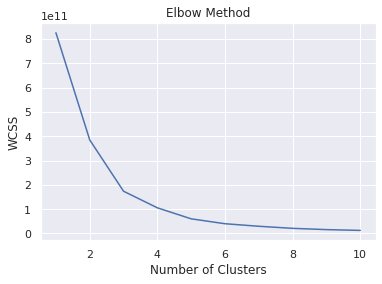

In [57]:
# Descobrindo o número ideal de clusters.
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

**PROCESSAMENTO DE DADOS**

Para o modelo performar melhor, precisamos padronizar os dados, nesse caso iremos usar o MinMaxScaler


In [58]:
# data preprocessing
scaler = MinMaxScaler()

scaled = scaler.fit_transform(X)

**K-Means**

Nossos dados estão prontos, podemos começar a agrupar nossos dados utilizando o K-means.

O objetivo é organizar as músicas em grupos, onde canções similares são colocados juntos.

In [59]:
# Inicializando o Modelo:

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaled)

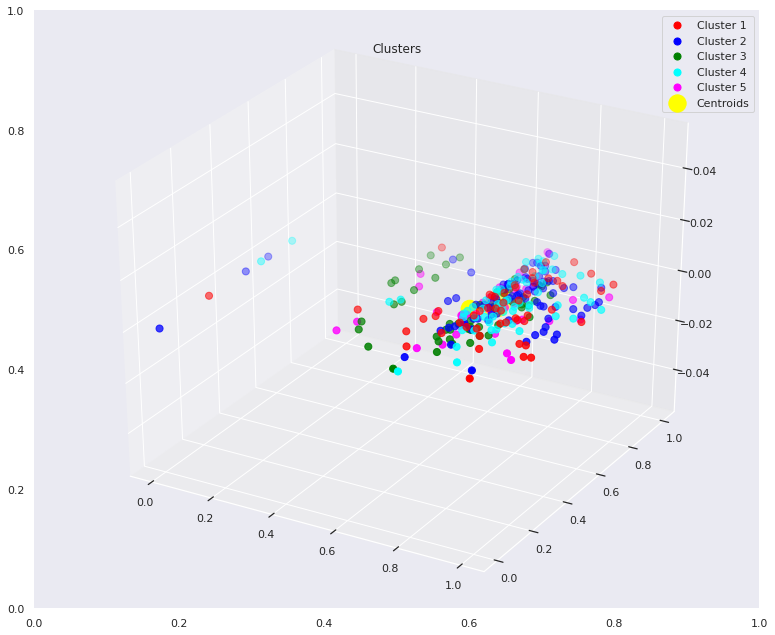

In [60]:
# Visualizando os grupos
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(scaled[y_kmeans == 0,0],scaled[y_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans == 1,0], scaled[y_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans == 2,0], scaled[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[y_kmeans == 3,0], scaled[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(scaled[y_kmeans == 4,0], scaled[y_kmeans == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')

# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

In [61]:
# Predições
y_kmeans

array([1, 2, 1, 4, 3, 1, 3, 4, 0, 0, 2, 1, 4, 3, 3, 3, 0, 1, 2, 2, 3, 3,
       3, 2, 1, 0, 2, 2, 0, 0, 2, 2, 3, 3, 1, 2, 0, 3, 3, 3, 2, 1, 2, 1,
       0, 2, 0, 3, 1, 2, 2, 0, 3, 3, 3, 0, 1, 0, 1, 1, 1, 1, 2, 4, 2, 4,
       1, 0, 4, 4, 0, 4, 3, 3, 0, 2, 1, 0, 1, 1, 4, 3, 3, 1, 2, 2, 3, 3,
       3, 1, 1, 0, 1, 2, 1, 1, 1, 2, 4, 1, 1, 3, 1, 3, 0, 2, 3, 0, 0, 2,
       2, 1, 3, 0, 1, 2, 1, 3, 4, 4, 3, 0, 4, 1, 3, 2, 3, 4, 4, 3, 2, 4,
       3, 0, 3, 1, 1, 4, 4, 1, 4, 1, 1, 1, 1, 0, 2, 1, 1, 1, 4, 0, 4, 4,
       3, 1, 0, 2, 0, 2, 4, 1, 0, 2, 2, 3, 2, 3, 1, 3, 4, 1, 2, 0, 3, 2,
       2, 0, 2, 0, 4, 2, 3, 3, 0, 4, 3, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2,
       0, 2, 3, 1, 1, 0, 3, 1, 3, 0, 2, 0, 2, 4, 2, 2, 1, 2, 3, 4, 3, 2,
       2, 1, 1, 1, 1, 4, 4, 2, 1, 4, 0, 3, 4, 0, 3, 2, 0, 1, 1, 3, 1, 3,
       0, 3, 4, 3, 0, 4, 1, 4, 1, 3, 3, 2, 2, 1, 4, 1, 4, 3, 1, 2, 3, 3,
       4, 1, 4, 3, 4, 4, 3, 0, 1, 0, 0, 1, 1, 0, 3, 1, 0, 4, 1, 0, 4, 1,
       1, 1, 1, 3, 4, 0, 0, 3, 1, 4, 4, 0, 0, 3], d

In [62]:
# convertendo as predições um um dataframe
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['k_cluster']

# predições como um df
print(kmeans.shape)
kmeans.head()

(300, 1)


,k_cluster
0,1
1,2
2,1
3,4
4,3


Agora que organizamos as músicas em grupos, é hora de verificar se os grupos fazem sentido. Para tal, vamos concatenar nossas predições com nossos dados originais.

In [63]:
df_cluster = pd.concat([df_cluster, kmeans], axis=1)

print(df_cluster.shape)
df_cluster.head()

(300, 18)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,k_cluster
0,Dadá Boladão,Surtada - Remix Brega Funk,5F8ffc8KWKNawllr5WsW0r,86,0.832,0.550,5,-7.026,0,0.0587,0.2490,0.000008,0.182,0.881,154.064,152784,4,1
1,Marília Mendonça,Supera - Ao Vivo,3GmJxfnUDrIs1iCfKUELFz,85,0.665,0.743,4,-4.434,1,0.0567,0.0604,0.000000,0.959,0.658,131.573,147748,4,2
2,MC Du Black,Gaiola É o Troco,3Uq45ipGutypFPmETfaoaH,85,0.722,0.840,10,-3.240,0,0.0785,0.4200,0.000000,0.112,0.851,150.108,187246,4,1
3,Anitta,Some que ele vem atrás,2qD7VoDYcrAPY0cVEfpsR5,84,0.648,0.795,0,-5.536,0,0.1700,0.0748,0.000000,0.380,0.598,180.043,194771,4,4
4,Jorge & Mateus,Cheirosa - Ao Vivo,2PWjKmjyTZeDpmOUa3a5da,84,0.528,0.870,11,-3.123,1,0.0851,0.2400,0.000000,0.333,0.714,152.370,181930,4,3


**Análise de dados dos grupos**

tendo as informações sobre os grupos, podemos verificar se o nosso modelo fez um bom trabalho.

In [64]:
# Média de popularidade por grupo
df_cluster.groupby(['k_cluster']).popularity.mean().sort_values(ascending=False)

k_cluster
0    74.584906
1    73.975000
3    73.268657
4    72.434783
2    67.888889
Name: popularity, dtype: float64

In [66]:
# Verificando o número de músicas por grupo
df_cluster['k_cluster'].value_counts()

1    80
3    67
2    54
0    53
4    46
Name: k_cluster, dtype: int64

In [67]:
# Verificando as músicas no grupo
df_cluster.loc[df_cluster['k_cluster'] == 0][:10]

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,k_cluster
8,Anitta,Combatchy (feat. MC Rebecca),2bPtwnrpFNEe8N7Q85kLHw,83,0.826,0.730,1,-3.032,1,0.0809,0.38300,0.000374,0.0197,0.605,150.134,157600,4,0
9,Zé Neto & Cristiano,Ferida Curada,1U3tv41tFRgOfbytpuYQrR,83,0.490,0.845,2,-3.359,1,0.0973,0.49000,0.000000,0.2130,0.548,146.105,159164,4,0
16,Luan Santana,quando a bad bater - ao vivo,1nVIlX3h3Ds9bH6JMQopIU,82,0.647,0.787,1,-4.767,1,0.0413,0.30700,0.000000,0.5320,0.535,128.121,179722,4,0
25,Marília Mendonça,Todo Mundo Vai Sofrer - Ao Vivo,4E6RdcCWMiHTu7zy1VTNDo,81,0.621,0.743,3,-3.864,1,0.0738,0.28100,0.000000,0.4110,0.581,111.454,154661,4,0
28,Dj Guuga,Vidrado Em Você,2kOmW169C7UV4SZDN9u0YO,80,0.843,0.925,2,0.302,1,0.0997,0.13900,0.000008,0.1090,0.590,159.926,134769,4,0
29,Yasmin Santos,"Para, Pensa e Volta - Ao Vivo",2KyXyTrp3kp1Fsg7B1osYD,80,0.611,0.791,2,-3.095,1,0.0436,0.24500,0.000000,0.2370,0.572,111.928,174179,4,0
36,Melim,Gelo,0J6cINt02c8UQqDG7vLShY,79,0.542,0.563,0,-7.446,1,0.0958,0.24200,0.000000,0.1090,0.897,169.909,149728,4,0
44,MC Doni,Te Amo Sem Compromisso,4mkagJJ8AM1hzeyrgAJc3x,78,0.940,0.711,3,-3.975,1,0.1910,0.00369,0.000117,0.0765,0.693,130.000,132923,4,0
46,Y2K,Lalala,51Fjme0JiitpyXKuyQiCDo,94,0.843,0.391,2,-7.899,1,0.0845,0.18100,0.000000,0.1370,0.496,129.972,160627,4,0
51,Zé Neto & Cristiano,Estado Decadente - Acústico,4eB8rsNNm5791m3uvEBNLR,77,0.757,0.687,1,-4.780,1,0.0658,0.58600,0.000000,0.1110,0.583,117.927,173831,4,0


In [68]:
# Distribuição estatística dos dados em cada coluna, para cada grupo
df_cluster.groupby("k_cluster").describe()

popularity                                                         \
               count       mean        std   min    25%   50%    75%    max   
k_cluster                                                                     
0               53.0  74.584906  15.935488   0.0  70.00  75.0  83.00   99.0   
1               80.0  73.975000  17.797721   0.0  70.00  74.5  82.25   98.0   
2               54.0  67.888889  13.108641  40.0  68.25  72.5  77.00   85.0   
3               67.0  73.268657  15.822483   0.0  69.50  74.0  79.50  100.0   
4               46.0  72.434783  12.069525  43.0  69.00  71.5  76.00   98.0   

          danceability                                                       \
                 count      mean       std    min      25%     50%      75%   
k_cluster                                                                     
0                 53.0  0.673830  0.140886  0.367  0.56500  0.6640  0.78300   
1                 80.0  0.715937  0.127339  0.265  0.63725  0.7355  0.80725   
2                 54.0  0.640833  0.123547  0.333  0.55325  0.6660  0.73700   
3                 67.0  0.712313  0.126035  0.327  0.62200  0.7020  0.80200   
4                 46.0  0.672391  0.126888  0.427  0.59850  0.6735  0.76275   

                 energy                                                      \
             max  count      mean       std    min      25%    50%      75%   
k_cluster                                                                     
0          0.940   53.0  0.639887  0.212480  0.111  0.53100  0.692  0.79100   
1          0.952   80.0  0.690563  0.160959  0.280  0.55900  0.708  0.80700   
2          0.847   54.0  0.779611  0.118009  0.481  0.70950  0.801  0.87425   
3          0.947   67.0  0.671836  0.187745  0.303  0.51650  0.700  0.82500   
4          0.957   46.0  0.670543  0.189762  0.183  0.57825  0.683  0.83650   

                   key                                                 \
             max count      mean       std  min  25%  50%   75%   max   
k_cluster                                                               
0          0.927  53.0  1.547170  1.323835  0.0  1.0  1.0   2.0   5.0   
1          0.977  80.0  8.462500  2.092444  5.0  6.0  9.0  10.0  11.0   
2          0.943  54.0  4.000000  3.649761  0.0  1.0  3.5   7.0  11.0   
3          0.973  67.0  8.074627  2.032415  4.0  6.0  8.0  10.0  11.0   
4          0.951  46.0  2.369565  2.143296  0.0  1.0  1.5   4.0   7.0   

          loudness                                                             \
             count      mean       std     min      25%    50%     75%    max   
k_cluster                                                                       
0             53.0 -6.152094  3.500657 -15.811 -7.70900 -5.386 -3.8640  0.302   
1             80.0 -5.953637  2.568134 -14.714 -7.19275 -5.809 -4.3540 -0.969   
2             54.0 -4.273944  1.675127  -9.343 -5.39750 -4.050 -3.1765 -1.152   
3             67.0 -5.505149  2.905228 -14.794 -7.22300 -5.041 -3.3090 -1.154   
4             46.0 -5.984217  2.878857 -14.454 -7.09950 -5.518 -3.7945 -1.586   

           mode                                    speechiness            \
          count mean  std  min  25%  50%  75%  max       count      mean   
k_cluster                                                                  
0          53.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0        53.0  0.103445   
1          80.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        80.0  0.119749   
2          54.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0        54.0  0.076880   
3          67.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0        67.0  0.188001   
4          46.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        46.0  0.158539   

                                                                acousticness  \
                std     min       25%      50%       75%    max        count   
k_cluster                                                                      
0          0.098006  0.0307 

**Conclusions**

Analisando os grupos, podemos ver que faz sentido, e que foi bem classificado.
é interessante notar que:


*   As músicas mais famosas estão no grupo 0.
*   A média de popularidade dentro dos grupos é muito similar
*   A média de popularidade no grupo 2 é bem menor que o do resto.
